<a href="https://colab.research.google.com/github/Jenicisprakash/machine-learning/blob/main/image_classification_use_tf%26keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [42]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

In [43]:

# Preprocessing: Normalize the pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [44]:
# Reshape the images to (28, 28, 1) as they are grayscale
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [45]:
# Convert the labels to one-hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [46]:
# Build the CNN Model
model = models.Sequential()

In [47]:
# First Convolutional Layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the 3D output to 1D and add a Dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 neurons (for 10 digit classes)
model.add(layers.Dense(10, activation='softmax'))


In [48]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [49]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.8626 - loss: 0.4437 - val_accuracy: 0.9822 - val_loss: 0.0596
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9824 - loss: 0.0587 - val_accuracy: 0.9863 - val_loss: 0.0430
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 55ms/step - accuracy: 0.9877 - loss: 0.0389 - val_accuracy: 0.9900 - val_loss: 0.0326
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9905 - val_loss: 0.0306
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 54ms/step - accuracy: 0.9938 - loss: 0.0200 - val_accuracy: 0.9907 - val_loss: 0.0327


In [54]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

# Make predictions on test images
predictions = model.predict(test_images)
print(f"Prediction for first test image: {np.argmax(predictions[243])}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9878 - loss: 0.0413
Test accuracy: 99.07%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Prediction for first test image: 7


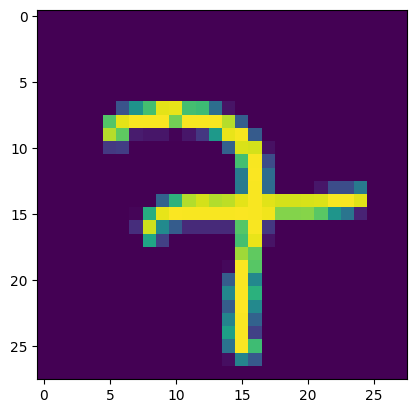

In [55]:
import matplotlib.pyplot as plt

plt.imshow(test_images[243])